In [1]:
#Para começar, importamos as bibliotecas necessárias para a análise.

In [3]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import pandas as pd
import requests
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from vega_datasets import data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from flask import Flask, request, jsonify

In [4]:
#ANTES DA IMPORTAÇÃO

In [6]:
df = pd.read_csv('test.csv')
print (df)

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [5]:
#DEPOIS DA IMPORTAÇÃO: é possível fazer uma leitura dos dados do arquivo .csv, ficando em forma de tabela.

In [4]:
data.list_datasets()

['7zip',
 'airports',
 'annual-precip',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2-concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare-dependencies',
 'flights-10k',
 'flights-200k',
 'flights-20k',
 'flights-2k',
 'flights-3m',
 'flights-5k',
 'flights-airport',
 'gapminder',
 'gapminder-health-income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa-electricity',
 'iris',
 'jobs',
 'la-riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal-2d',
 'obesity',
 'ohlc',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle-temps',
 'seattle-weather',
 'sf-temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment-across-industries',
 'uniform-2d',
 'us-10m',
 'us-employment',
 'us-state-capitals',
 'volcano',
 'weather',
 'weball26',
 'wheat',

In [5]:
#Algoritmos de Machine Learning: a aprtir de agora trabalharemos com os dois algoritmos de ML sugeridos pelo professor, Regressão e Classificação.

In [6]:
X = df [['User_ID']]
y = df['Gender']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
numeric_features = ['age', 'stay_in_current_city_years']
categorical_features = ['gender', 'occupation', 'city_category', 'marital_status']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())

])

In [9]:
numeric_features = ['age', 'stay_in_current_city_years']
categorical_features = ['gender', 'occupation', 'city_category', 'marital_status']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))

])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer,
 categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

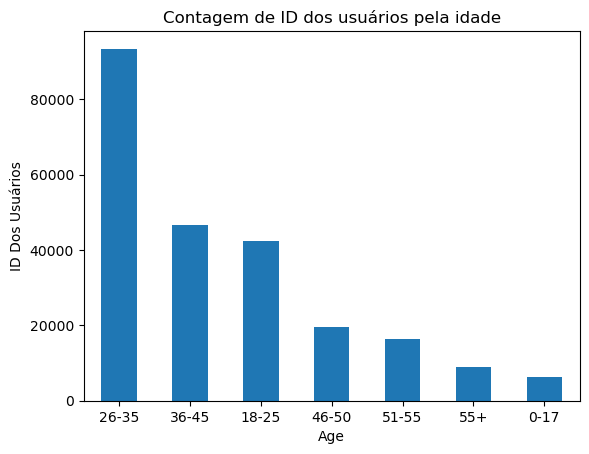

In [10]:
age_counts = df['Age'].value_counts()

# Criando o gráfico de barras
age_counts.plot(kind='bar')
plt.title('Contagem de ID dos usuários pela idade')
plt.xlabel('Age')
plt.ylabel('ID Dos Usuários')
plt.xticks(rotation=0)
plt.show()

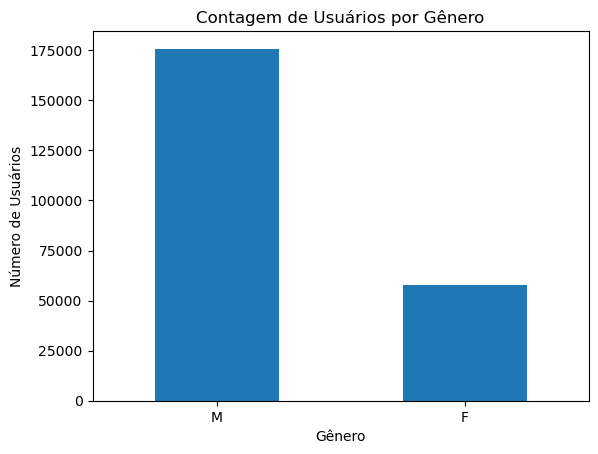

In [11]:
gender_counts = df['Gender'].value_counts()

# Criando o gráfico de barras
gender_counts.plot(kind='bar')
plt.title('Contagem de Usuários por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=0)
plt.show()

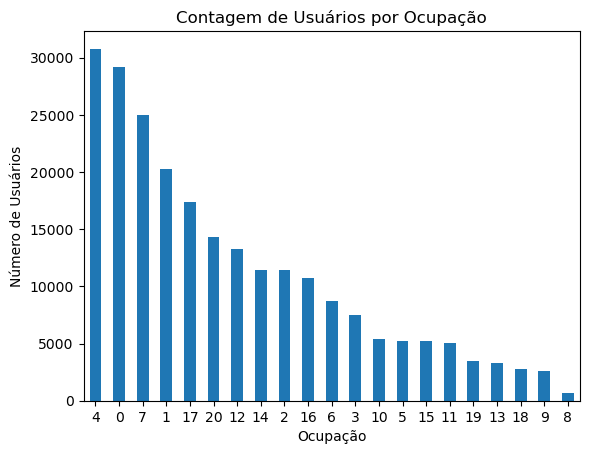

In [14]:
occupation_counts = df['Occupation'].value_counts()

# Criando o gráfico de barras
occupation_counts.plot(kind='bar')
plt.title('Contagem de Usuários por Ocupação')
plt.xlabel('Ocupação')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=0)
plt.show()

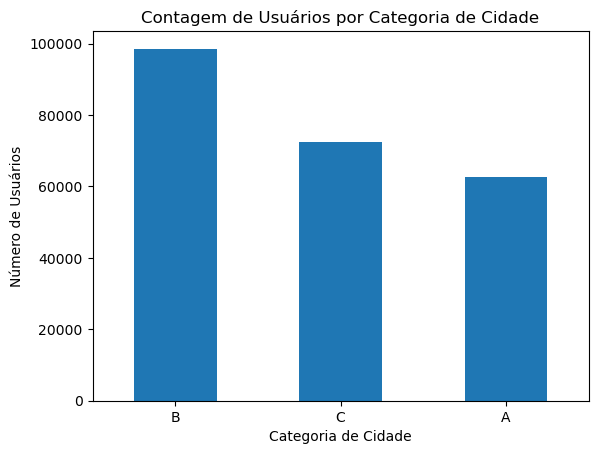

In [15]:
city_category_counts = df['City_Category'].value_counts()

# Criando o gráfico de barras
city_category_counts.plot(kind='bar')
plt.title('Contagem de Usuários por Categoria de Cidade')
plt.xlabel('Categoria de Cidade')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=0)
plt.show()

In [16]:
city_category_counts = df['City_Category'].value_counts()
print(city_category_counts)

City_Category
B    98566
C    72509
A    62524
Name: count, dtype: int64


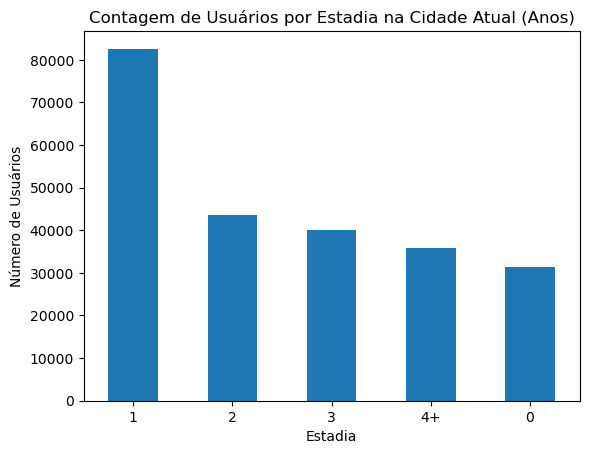

In [17]:
stay_in_current_city_years_counts = df['Stay_In_Current_City_Years'].value_counts()

# Criando o gráfico de barras
stay_in_current_city_years_counts.plot(kind='bar')
plt.title('Contagem de Usuários por Estadia na Cidade Atual (Anos)')
plt.xlabel('Estadia')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=0)
plt.show()

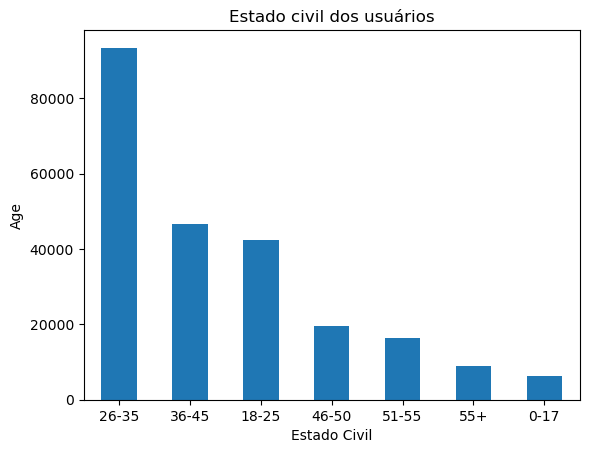

In [18]:
age_counts = df['Age'].value_counts()

# Criando o gráfico de barras
age_counts.plot(kind='bar')
plt.title('Estado civil dos usuários')
plt.xlabel('Estado Civil')
plt.ylabel('Age')
plt.xticks(rotation=0)
plt.show()

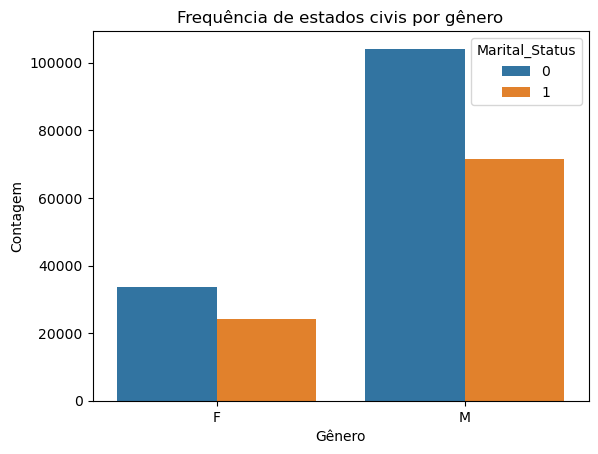

In [19]:
counts = df.groupby(['Gender', 'Marital_Status']).size().reset_index(name='count')

# Criando o gráfico de barras
sns.barplot(x='Gender', y='count', hue='Marital_Status', data=counts)

# Personalizando o gráfico (opcional)
plt.title('Frequência de estados civis por gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

In [21]:
contingency_table = pd.crosstab(df['Gender'], df['Marital_Status'])
print(contingency_table)

Marital_Status       0      1
Gender                       
F                33648  24179
M               104159  71613


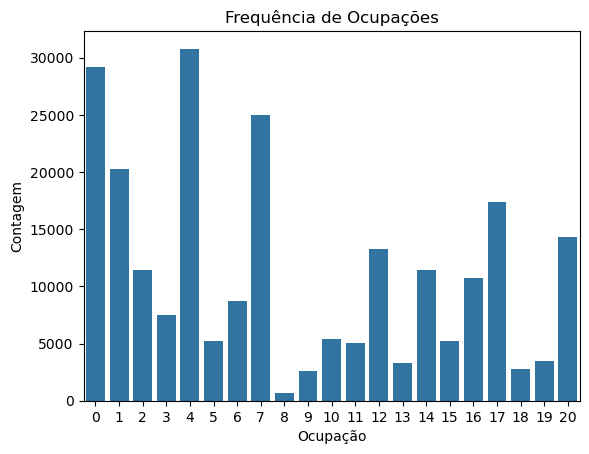

In [22]:
occupation_counts = df['Occupation'].value_counts()

# Criando o gráfico de barras
sns.barplot(x=occupation_counts.index, y=occupation_counts)
plt.xlabel('Ocupação')
plt.ylabel('Contagem')
plt.title('Frequência de Ocupações')
plt.show()

In [23]:
occupation_counts = df['Occupation'].value_counts()
print(occupation_counts)

Occupation
4     30778
0     29212
7     24994
1     20261
17    17375
20    14278
12    13269
14    11473
2     11408
16    10751
6      8747
3      7476
10     5374
5      5196
15     5191
11     5007
19     3458
13     3325
18     2745
9      2638
8       643
Name: count, dtype: int64


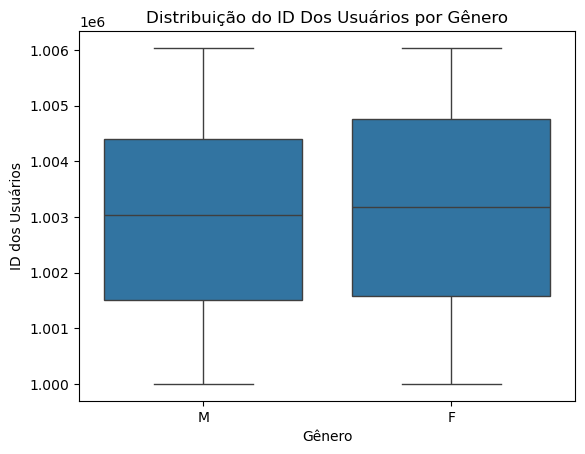

In [13]:
sns.boxplot(x='Gender', y='User_ID', data=df)
plt.title('Distribuição do ID Dos Usuários por Gênero')
plt.xlabel('Gênero')
plt.ylabel('ID dos Usuários')
plt.show()

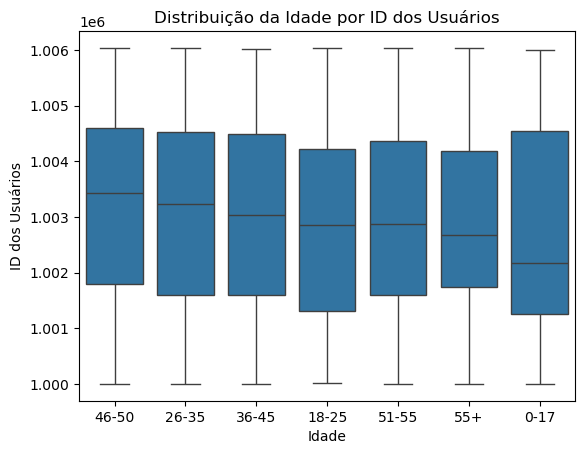

In [12]:
sns.boxplot(x='Age', y='User_ID', data=df)
plt.title('Distribuição da Idade por ID dos Usuários')
plt.xlabel('Idade')
plt.ylabel('ID dos Usuários')
plt.show()

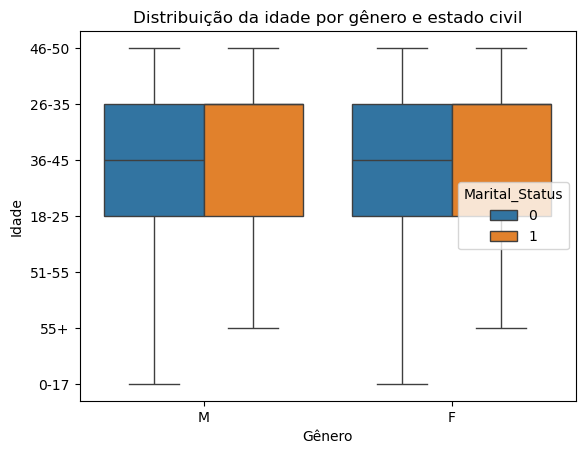

In [20]:
sns.boxplot(x='Gender', y='Age', hue='Marital_Status', data=df)

# Personalizando o gráfico (opcional)
plt.title('Distribuição da idade por gênero e estado civil')
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.show()

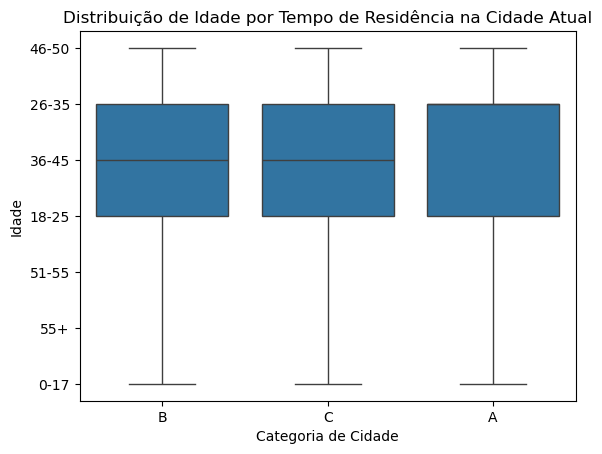

In [24]:
sns.boxplot(x='City_Category', y='Age', data=df)

# Personalizando o gráfico (opcional)
plt.title('Distribuição de Idade por Tempo de Residência na Cidade Atual')
plt.xlabel('Categoria de Cidade')
plt.ylabel('Idade')
plt.show()

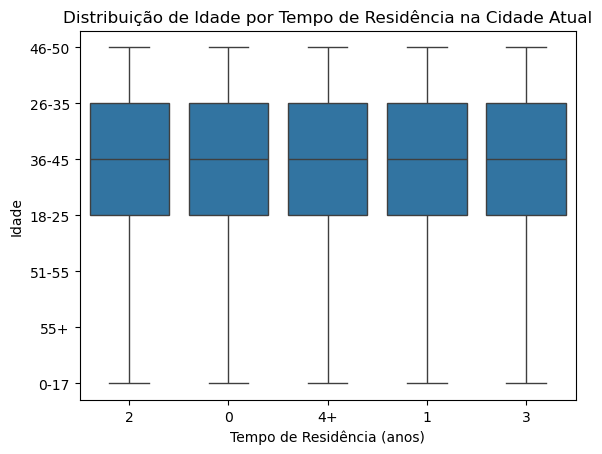

In [25]:
sns.boxplot(x='Stay_In_Current_City_Years', y='Age', data=df)

# Personalizando o gráfico (opcional)
plt.title('Distribuição de Idade por Tempo de Residência na Cidade Atual')
plt.xlabel('Tempo de Residência (anos)')
plt.ylabel('Idade')
plt.show()

In [31]:
media_occupation = df['Occupation'].mean()
print (media_occupation)

8.085407043694536


In [33]:
mediana_occupation = df['Occupation'].median()
print (mediana_occupation)

7.0


In [34]:
desvio_padrao_occupation = df['Occupation'].std()
print(desvio_padrao_occupation)

6.521146481497116


In [39]:
media_marital_status = df['Marital_Status'].mean()
mediana_marital_status = df['Marital_Status'].median()
desvio_padrao_marital_status = df['Marital_Status'].std()

print(media_marital_status)
print(mediana_marital_status)
print(desvio_padrao_marital_status)

0.4100702485883929
0.0
0.49184720737774434


In [35]:
media_user_id = df['User_ID'].mean()
mediana_user_id = df['User_ID'].median()
desvio_padrao_user_id = df['User_ID'].std()

print(media_user_id)
print(mediana_user_id)
print(desvio_padrao_user_id)

1003029.3568594044
1003070.0
1726.5049679955605


In [40]:
media_product_category_1 = df['Product_Category_1'].mean()
mediana_product_category_1 = df['Product_Category_1'].median()
desvio_padrao_product_category_1 = df['Product_Category_1'].std()

print(media_product_category_1)
print(mediana_product_category_1)
print(desvio_padrao_product_category_1)

5.276542279718663
5.0
3.7363801122637716


In [43]:
media_product_category_2 = df['Product_Category_2'].mean()
mediana_product_category_2 = df['Product_Category_2'].median()
desvio_padrao_product_category_2 = df['Product_Category_2'].std()

print(media_product_category_2)
print(mediana_product_category_2)
print(desvio_padrao_product_category_2)

9.849586059346997
9.0
5.094942849771285


In [42]:
media_product_category_3 = df['Product_Category_3'].mean()
mediana_product_category_3 = df['Product_Category_3'].median()
desvio_padrao_product_category_3 = df['Product_Category_3'].std()

print(media_product_category_3)
print(mediana_product_category_3)
print(desvio_padrao_product_category_3)

12.669453946534905
14.0
4.125944373516565


In [ ]:
#Abaixo, tentamos fazer web api, porém fala que não é adequado para a produção.

In [4]:
app = Flask(__name__)
def enrich_data(data):
    return enriched_data

@app.route('/enrich', methods=['POST'])
def enrich():
    data = request.json  # Recebe os dados JSON enviados na requisição
    enriched_data = enrich_data(data)
    return jsonify(enriched_data)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\anaca\miniconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
print(df.isnull().sum())

# Preencher valores ausentes na coluna 'idade' com a média
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Remover linhas duplicadas
df.drop_duplicates(inplace=True)

# Salvar os dados limpos
df.to_csv('test.csv', index=False)

NameError: name 'df' is not defined

In [ ]:
'''Perguntas sobre o projeto: VARIAVEIS, RESULTADOS, FIT
1. Qual a fonte dos dados?
A fonte é o kaggle. Pegamos uma base de dados sobre "Black Friday Sales".

2. Como os dados estão representados?
Estão representados em gráficos, boxplots e tabelas. 

3. Qual(is) linguagem(ns) de programação está(ão) sendo usada(s) e sua(s) respectiva(s) biblioteca(s)?
Está sendo a linguagem Python. As biblipteca sque utilizamos são scikit-learn, matplotlib, pandas, numpy, requests, seaborn e hvplot.

4. Quais as variáveis uilizadas e as relações entre elas?
As variáveis são User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2 e Product_Category_3.
Suas relações são voltadas às promoções de BlackFriday, onde nos permite saber a idade de quem compra mais, gênero da pessoa, estado civil, categoria dos produtos, o local de onde esses moradores compram esses produtos...
Esses dados nos permitem saber se a população de renda mais alta, mediana e baixa que compra mais ou menos.

5. Quais são as medidas descritivas utilizadas?
Média, mediana e desvio padrão.

6. Quais conclusões podem ser obtidas diantes dos dados da quuestão anterior?

7. Quais as classificações das variáveis?
São numéricas, alfanuméricas e categóricas.

8. É possível fazer comparação entre "gender" e "age" (duas variáveis diferentes em questão de categoria, sendo respectivamente uma categórica e outra numérica?
Sim, comparando "gender" com "age", tem como obter informações sobre qual é o público que mais compra, se é homem ou mulher, mais velho ou mais novo.

9. 

<Axes: >

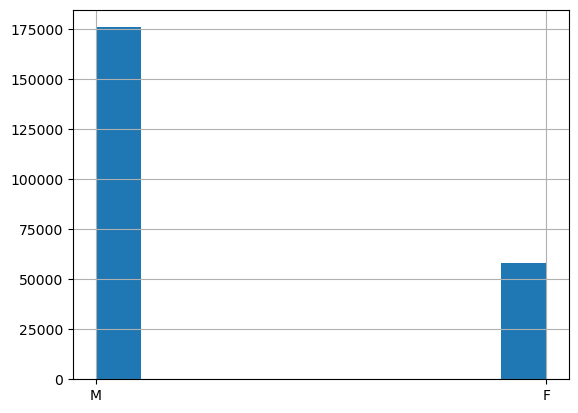

In [54]:
#Histograma
df['Gender'].hist()

In [58]:
df['Gender'].describe()

count     233599
unique         2
top            M
freq      175772
Name: Gender, dtype: object

<Axes: >

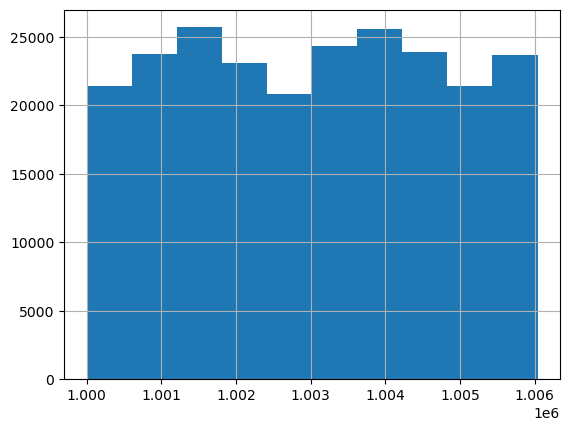

In [59]:
df['User_ID'].hist()

<Axes: >

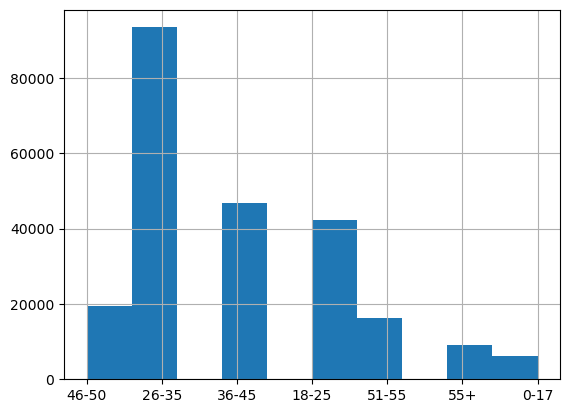

In [64]:
df['Age'].hist()

<Axes: >

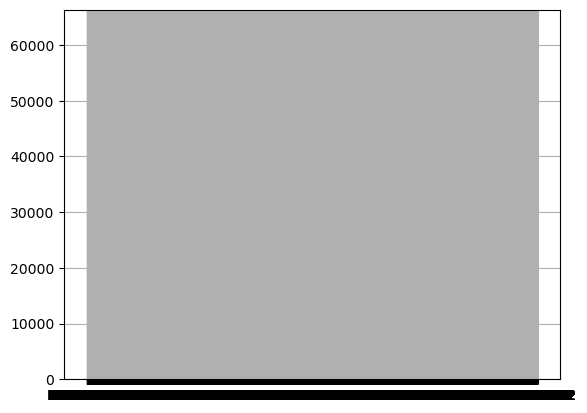

In [60]:
df['Product_ID'].hist()

<Axes: >

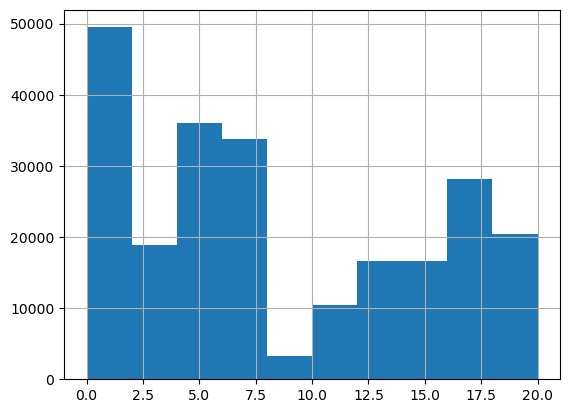

In [61]:
df['Occupation'].hist()

<Axes: >

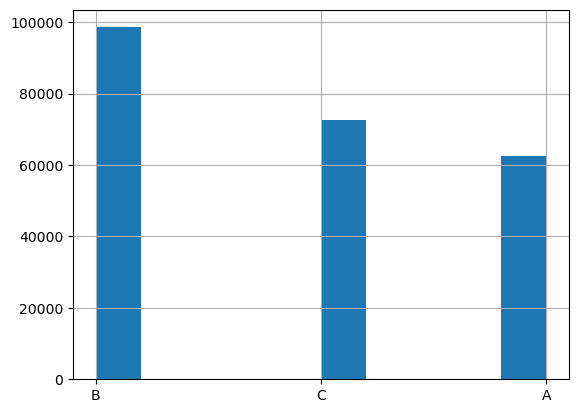

In [63]:
df['City_Category'].hist()

<Axes: >

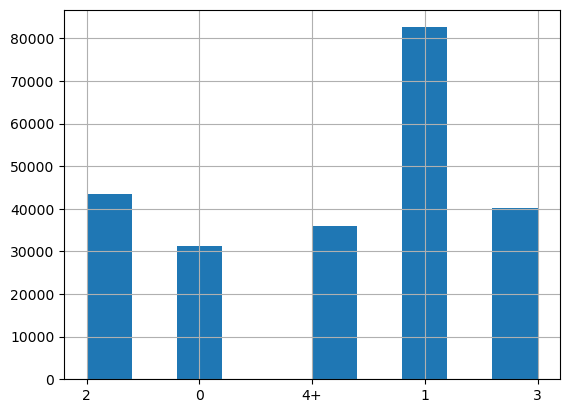

In [66]:
df['Stay_In_Current_City_Years'].hist()

<Axes: >

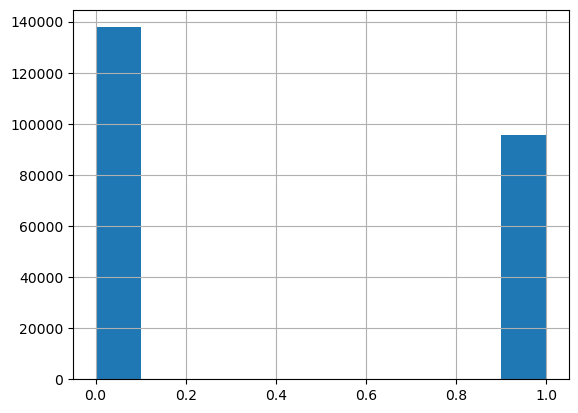

In [67]:
df['Marital_Status'].hist()

In [ ]:
#Medidas de Dispersão

In [97]:
media_users = df['Gender'].mean()
display (media_users)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [99]:
mediana_idade = df['Age'].median()
display (mediana_idade)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [68]:
#Gráficos Boxplots

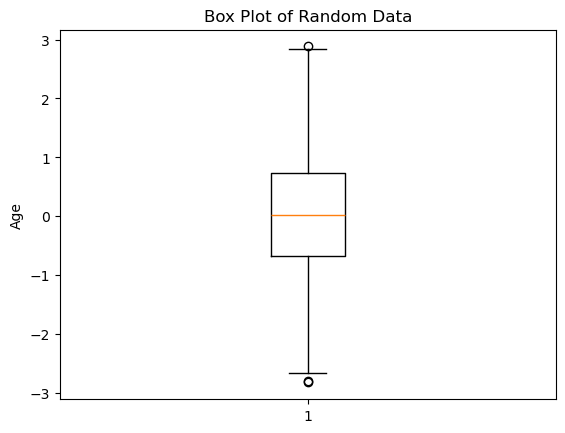

In [69]:
df = np.random.randn(1000)

# Create the box plot
plt.boxplot(df)
plt.title('Box Plot of Random Data')
plt.ylabel('Age')
plt.show()

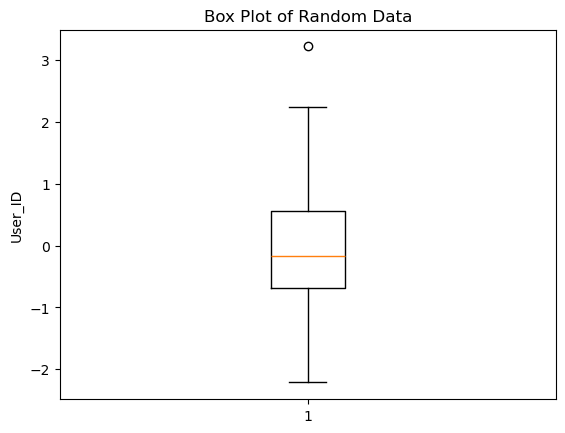

In [71]:
df = np.random.randn(100)

# Create the box plot
plt.boxplot(df)
plt.title('Box Plot of Random Data')
plt.ylabel('User_ID')
plt.show()

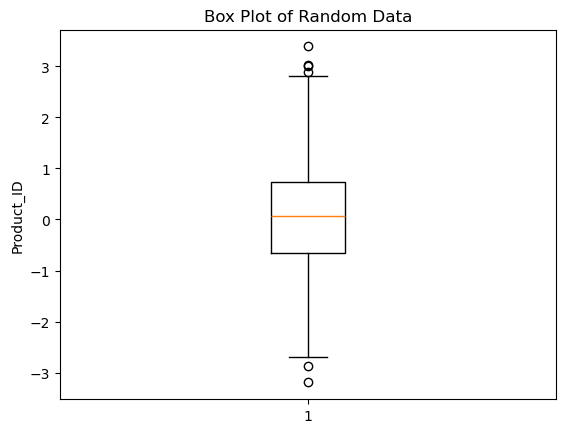

In [77]:
df = np.random.randn(1000)

# Create the box plot
plt.boxplot(df)
plt.title('Box Plot of Random Data')
plt.ylabel('Product_ID')
plt.show()

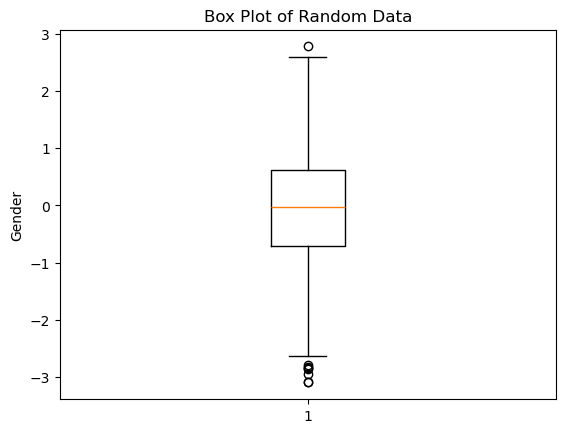

In [78]:
df = np.random.randn(1000)

# Create the box plot
plt.boxplot(df)
plt.title('Box Plot of Random Data')
plt.ylabel('Gender')
plt.show()

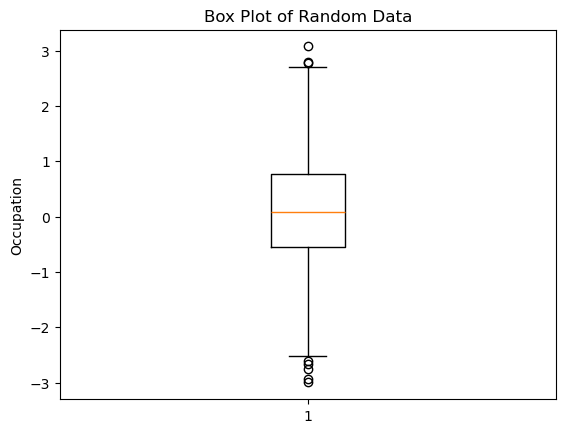

In [79]:
df = np.random.randn(1000)

# Create the box plot
plt.boxplot(df)
plt.title('Box Plot of Random Data')
plt.ylabel('Occupation')
plt.show()

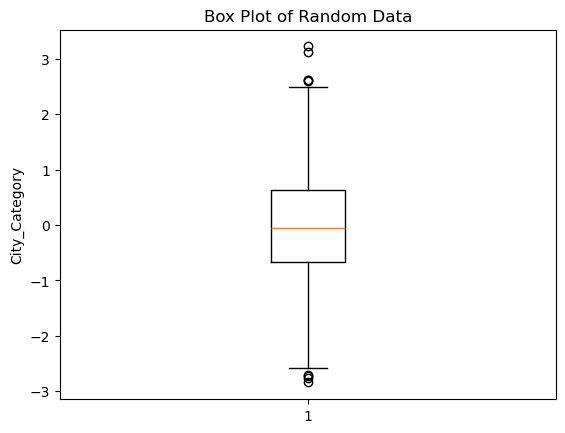

In [80]:
df = np.random.randn(1000)

# Create the box plot
plt.boxplot(df)
plt.title('Box Plot of Random Data')
plt.ylabel('City_Category')
plt.show()

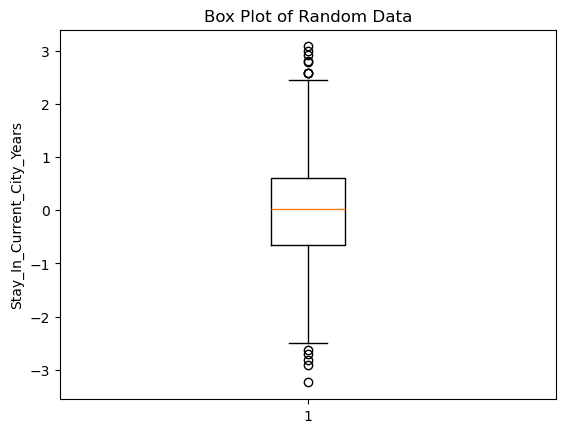

In [81]:
df = np.random.randn(1000)

# Create the box plot
plt.boxplot(df)
plt.title('Box Plot of Random Data')
plt.ylabel('Stay_In_Current_City_Years')
plt.show()

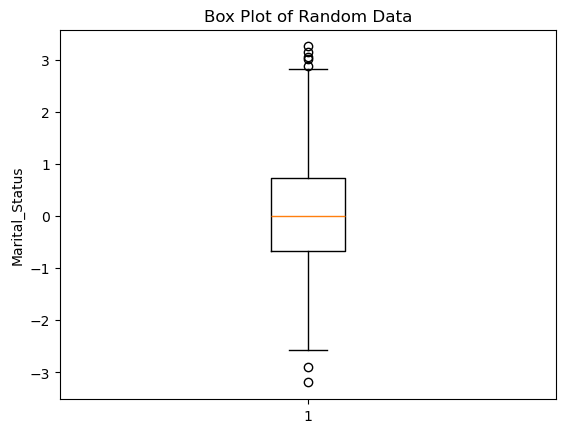

In [82]:
df = np.random.randn(1000)

# Create the box plot
plt.boxplot(df)
plt.title('Box Plot of Random Data')
plt.ylabel('Marital_Status')
plt.show()

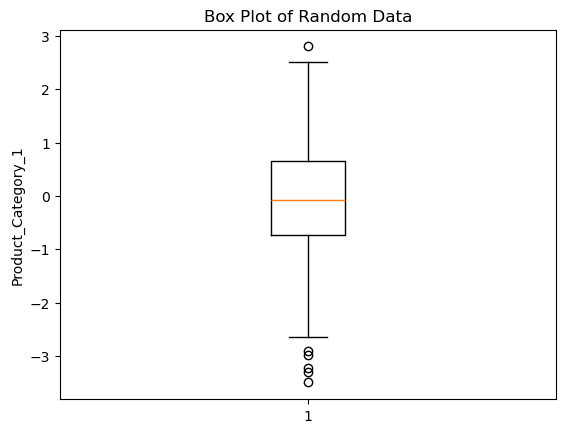

In [83]:
df = np.random.randn(1000)

# Create the box plot
plt.boxplot(df)
plt.title('Box Plot of Random Data')
plt.ylabel('Product_Category_1')
plt.show()

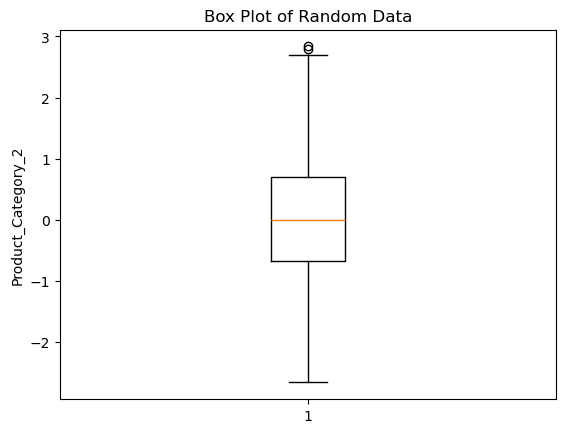

In [84]:
df = np.random.randn(1000)

# Create the box plot
plt.boxplot(df)
plt.title('Box Plot of Random Data')
plt.ylabel('Product_Category_2')
plt.show()

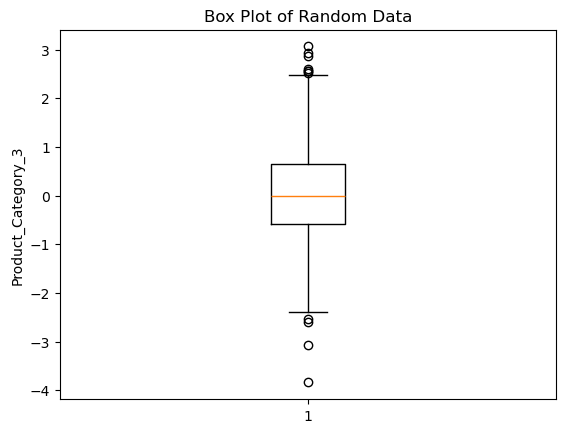

In [85]:
df = np.random.randn(1000)

# Create the box plot
plt.boxplot(df)
plt.title('Box Plot of Random Data')
plt.ylabel('Product_Category_3')
plt.show()

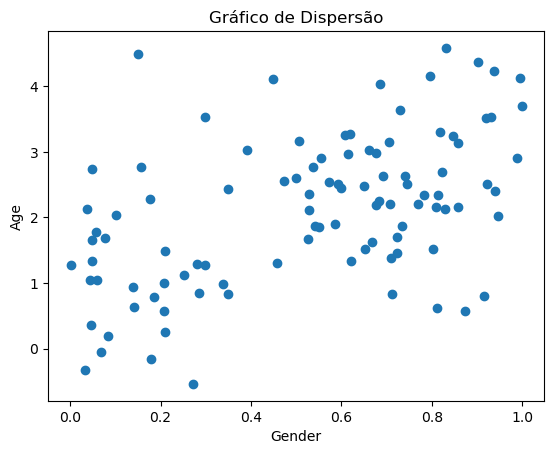

In [89]:
x = np.random.rand(100)
y = 2 * x + 1 + np.random.randn(100)

# Criando o gráfico de dispersão
plt.scatter(x, y)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Gráfico de Dispersão')

plt.show()

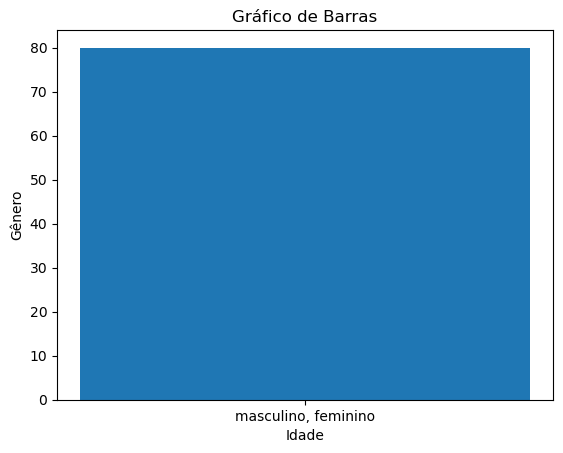

In [93]:
categoria_genero = ['masculino, feminino']
idade = [10,20,30,40,50,60,70,80]

# Criar o gráfico de barras
plt.bar(categoria_genero, idade)

# Adicionar título e rótulos
plt.title('Gráfico de Barras')
plt.xlabel('Idade')
plt.ylabel('Gênero')

# Exibir o gráfico
plt.show()